# Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialgraphs2025/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 30th, 2025 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Assignment 1.1: Exploring WS and BA models

This first part draws on the Watts-Stogatz and Barabasi-Albert models from Week 3. You should provide solutions to the exercises with the following titles from **Part 1** 

* *Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook*

* *WS edition*

And from **Part 2**

* *BA Edition*.
  * **Note**: The second part of this exercise (after the questions to the text) first has you build a BA network step-by-step, but doesn't ask any questions. For that part, I would simply like you to write well-documented code that shows how you build the network. 


## Answer for part 1: 

### Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook

#### What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

The problem with random networks as a model for real-world networks according to the argument in section 3.5 is that, if people are randomly connected to each other, there will be
 outliers. 

#### List the four regimes that characterize random networks as a function of $\langle k \rangle$.

The four regime that characterize random networks as a function of $\langle k \rangle$ is:

**Subcritical Regime** where the network consist of numerous tiny components, where the size og these tiny components follows a exponential distribution. The components have a comparable size and lack with a clear winner that could designate as a giant component. 

Then there is:

**Critical Point** where most of the nodes are located in numerous small components, where the size of the distribution follows $p_s \sim s^{−\frac{3}{2}}$. Here is the power law an indicates of that component of rather different sizes coexist. The numerous small components are primarily trees, and the giant components might obtain loops. 

Next regime is:

**Supercritical Regime** where the numerous is isolated components coexist with a giant component. The components size distribution follows $p_s \sim s^{−\frac{3}{2}}e^{−(⟨k⟩−1)s+(s−1)ln⟨k⟩}$. The samll components are trees, while the giant component contains loops and cycles. In the supercritical regime lasts until all nodes are captivated by the giant component. 

The final regime is:

**Conected Regime** is a random network model, that predicts the emergence of a network that is not a smooth and gradual process. The isolated nodes and tiny components observed for small $\langle k \rangle$ collapse, into a giant component through a phase transition. 

#### According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

### WS edition 

#### First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one.

To calculate the averages shortest path with length $\langle d \rangle$ for each one, by using `networkx`.

The first part is to generate the $3$ graph with $500$ nodes each an average degree $= 4$ a rewiring probablity of $p = 0, 0.1,$ and $1$ by using `nx.watt_strogatz_graph`.

In [11]:
import networkx as nx

WS1 = nx.watts_strogatz_graph(500, 4, 0)
WS2 = nx.watts_strogatz_graph(500, 4, 0.1)
WS3 = nx.watts_strogatz_graph(500, 4, 1)

To calculate the average shortest path length $\langle d \rangle$ for each one, `nx.average_shortest_path_length` is used. 

In [12]:
nx.average_shortest_path_length(WS1), nx.average_shortest_path_length(WS2), nx.average_shortest_path_length(WS3)

(62.875751503006015, 7.565394789579158, 4.761346693386773)

The average shortest path length $\langle d \rangle$ for each one of the $3$ graph is: 

For WS1, the average shortest path length is $62.9$. The average shortest path length for WS2 is $7.6$ and for the last average shortest path length WS3 is $4.8$. 

#### Describe what happens to the network when $p = 1$.

For $p = 1$ then $‹k›= N-1$, hence the network is a complete graph and all nodes belong to a single component.

This is a fully randomized network. 

#### Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.

To generate a lot of networks with different values of $p$, a python code is generated a range that create $100$ values between 0 and 1.

The loop generates a Watts–Strogatz small-world graph with parameters $(500, \, 4, \, p)$, where $500$ is the number of nodes, $4$ is each node that is initially connected to $4$ nearest neighbors in a ring topology and last $p$ is the rewirting probability.

In [14]:
import numpy as np

ranges = np.linspace(0, 1, 100)

avg_path_lengths = []

for p in ranges:
    G = nx.watts_strogatz_graph(500, 4, p)
    avg_path_length = nx.average_shortest_path_length(G)
    avg_path_lengths.append(avg_path_length)

By plotting the values, the plot can tell where the averages shortest path length gets close to the shortest path by the curve is getting flat.

/var/folders/9t/dgrpr5k1301gkxfhv4bs04wm0000gn/T/ipykernel_77638/3139296116.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


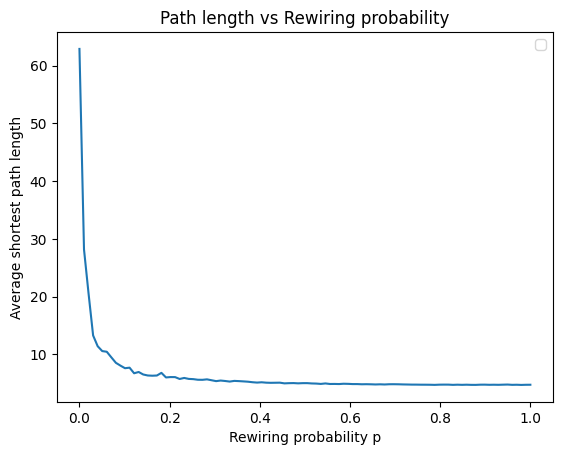

In [15]:
import matplotlib.pyplot as plt

# Now we plot but zoom in:
plt.plot(ranges, avg_path_lengths)
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length")
plt.title("Path length vs Rewiring probability")
plt.legend()
plt.show()

It can be difficult to see where exact the curve is getting flat. By zooming into the graph below, it is getting easier to see where the averages shortest path length gets close to the shortest path.

/var/folders/9t/dgrpr5k1301gkxfhv4bs04wm0000gn/T/ipykernel_77638/2737895974.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


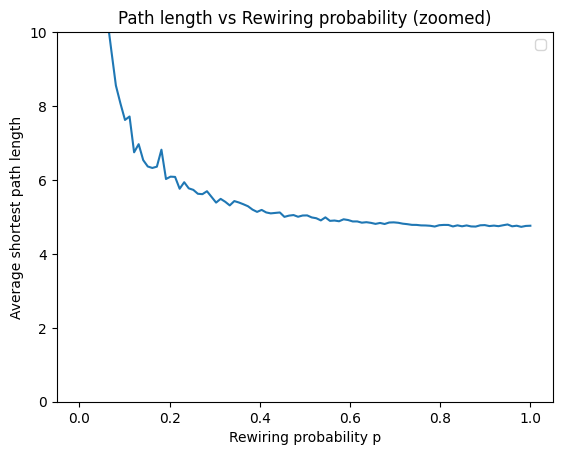

In [16]:
# Now we plot but zoom in:
plt.plot(ranges, avg_path_lengths)
plt.ylim(0, 10)
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length")
plt.title("Path length vs Rewiring probability (zoomed)")
plt.legend()
plt.show()

After zooming into the graph, then it is possible to see that the averages shortest path length gets close to the shortest path around $p= 0.6$.

#### Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [17]:
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

avg_path_lengths = []
std_dev_path_lengths = []

for p in p_values:
    path_lengths = []
    for _ in range(50):
        G = nx.watts_strogatz_graph(500, 4, p)
        avg_path_length = nx.average_shortest_path_length(G)
        path_lengths.append(avg_path_length)
        
    avg_path_lengths.append(np.mean(path_lengths))
    std_dev_path_lengths.append(np.std(path_lengths))

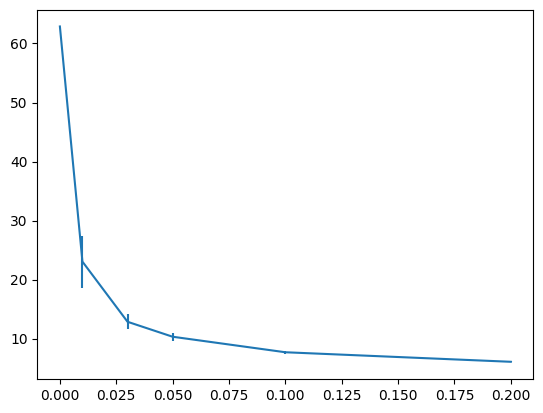

In [21]:
plt.errorbar(p_values, avg_path_lengths, yerr=std_dev_path_lengths)
plt.show()

#### Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

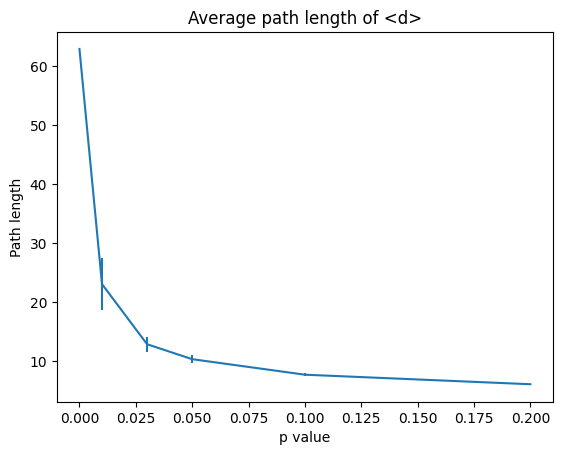

In [20]:
plt.errorbar(p_values, avg_path_lengths, yerr=std_dev_path_lengths)
plt.title("Average path length of <d>")
plt.xlabel("p value")
plt.ylabel("Path length")
plt.show()

## Answer for part 2:

# Assignment 1.2: Stats and visualization of the Rock Music Network

This second part requires you to have built the network of Rock Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Explain your process in words*

* *Simple network statistics and analysis*.

  * **Note related to this and the following exercise**. It is nice to have the dataset underlying the statistics and visualization available when we grade. Therefore, I recommend that you create a small *network dataset*, which is simply your graph stored in some format that you like (since it's only a few hundred nodes and a few thousand edges, it won't take up a lot of space). You can then place that network one of your group members' GitHub account (or some other server that's available online) and have your Jupyter Notebook fetch that dataset when it runs. (It's OK to use an LLM for help with setting this up, if it seems difficult). 

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.